In [6]:
#.venu Python 3.13.1
#myenv Python 3.8.20
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima


data_2002 = pd.read_csv('StormEvents_details-ftp_v1.0_d2002_c20220425.csv')
data_2003 = pd.read_csv('StormEvents_details-ftp_v1.0_d2003_c20220425.csv')
data_2004 = pd.read_csv('StormEvents_details-ftp_v1.0_d2004_c20220425.csv')
data_2005 = pd.read_csv('StormEvents_details-ftp_v1.0_d2005_c20220425.csv')
data_2006 = pd.read_csv('StormEvents_details-ftp_v1.0_d2006_c20250122.csv')
data_2007 = pd.read_csv('StormEvents_details-ftp_v1.0_d2007_c20240216.csv')
data_2008 = pd.read_csv('StormEvents_details-ftp_v1.0_d2008_c20240620.csv')
data_2009 = pd.read_csv('StormEvents_details-ftp_v1.0_d2009_c20231116.csv')
data_2010 = pd.read_csv('StormEvents_details-ftp_v1.0_d2010_c20220425.csv')
data_2011 = pd.read_csv('StormEvents_details-ftp_v1.0_d2011_c20230417.csv')
data_2012 = pd.read_csv('StormEvents_details-ftp_v1.0_d2012_c20221216.csv')
data_2013 = pd.read_csv('StormEvents_details-ftp_v1.0_d2013_c20230118.csv')
data_2014 = pd.read_csv('StormEvents_details-ftp_v1.0_d2014_c20231116.csv')
data_2015 = pd.read_csv('StormEvents_details-ftp_v1.0_d2015_c20240716.csv')
data_2016 = pd.read_csv('StormEvents_details-ftp_v1.0_d2016_c20220719.csv')
data_2017 = pd.read_csv('StormEvents_details-ftp_v1.0_d2017_c20250122.csv')
data_2018 = pd.read_csv('StormEvents_details-ftp_v1.0_d2018_c20240716.csv')
data_2019 = pd.read_csv('StormEvents_details-ftp_v1.0_d2019_c20240117.csv')
data_2020 = pd.read_csv('StormEvents_details-ftp_v1.0_d2020_c20240620.csv')
data_2021 = pd.read_csv('StormEvents_details-ftp_v1.0_d2021_c20240716.csv')
data_2022 = pd.read_csv('StormEvents_details-ftp_v1.0_d2022_c20241121.csv')
data_2023 = pd.read_csv('StormEvents_details-ftp_v1.0_d2023_c20250317.csv')
data_2024 = pd.read_csv('StormEvents_details-ftp_v1 (version 2).xlsb.csv')

C:\Users\jaseb\AppData\Local\Temp\ipykernel_27728\1861725133.py:17: DtypeWarning: Columns (29,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2006 = pd.read_csv('StormEvents_details-ftp_v1.0_d2006_c20250122.csv')


In [7]:

#Injuries/fatalities #Jase
#Begin and End Long and Lat #Jase
import pandas as pd

df = pd.read_csv('StormEvents_details-ftp_v1 (version 2).xlsb.csv')

fatalities_texas = df[(df['DEATHS_DIRECT'] > 0) & (df['STATE'] == 'TEXAS')]

fatalities_texas = fatalities_texas[['EVENT_ID', 'DEATHS_DIRECT']]

fatalities_texas

EVENT_ID  DEATHS_DIRECT
1841    1160124              1
11694   1159277              1
20233   1170606              1
21392   1209186              1
23166   1178204              1
25844   1204419              1
27062   1206040              1
27349   1182292              7
27512   1188425              4
27516   1170633              1
27615   1180482              1
27655   1183967              3
31579   1165426              1
43723   1196642              1
43846   1195574              1
51256   1205694              1
52076   1205801              1
53441   1221760              1
58297   1207044              1
58635   1207006              1
58975   1207039              1
59267   1205215              3
64847   1221577              1
65574   1216288              1

In [8]:
fatalities_direct_texas = df[(df['DEATHS_DIRECT'] > 0) & (df['STATE'] == 'TEXAS')][['EVENT_ID', 'DEATHS_DIRECT']].rename_axis("Texas Fatalities in 2024")

fatalities_direct_texas

EVENT_ID  DEATHS_DIRECT
Texas Fatalities in 2024                         
1841                       1160124              1
11694                      1159277              1
20233                      1170606              1
21392                      1209186              1
23166                      1178204              1
25844                      1204419              1
27062                      1206040              1
27349                      1182292              7
27512                      1188425              4
27516                      1170633              1
27615                      1180482              1
27655                      1183967              3
31579                      1165426              1
43723                      1196642              1
43846                      1195574              1
51256                      1205694              1
52076                      1205801              1
53441                      1221760              1
58297                      1207044              1
58635                      1207006              1
58975                      1207039              1
59267                      1205215              3
64847                      1221577              1
65574                      1216288              1

In [9]:
fatalities_indirect_texas = df[(df['DEATHS_INDIRECT'] > 0) & (df['STATE'] == 'TEXAS')][['EVENT_ID', 'DEATHS_INDIRECT']].rename_axis("Texas Fatalities Indirect in 2024")

fatalities_indirect_texas

EVENT_ID  DEATHS_INDIRECT
Texas Fatalities Indirect in 2024                           
27512                               1188425                4
27655                               1183967                8
53493                               1212201                1
54303                               1212214                1
55011                               1218183                1
55072                               1211791                1
55074                               1211793                1
61103                               1204837                5
61269                               1183980                1
62413                               1188491                1

In [10]:
injuries_direct_texas = df[(df['INJURIES_DIRECT'] > 0) & (df['STATE'] == 'TEXAS')][['EVENT_ID', 'INJURIES_DIRECT']].rename_axis("Texas Injuries Direct in 2024")

injuries_direct_texas

EVENT_ID  INJURIES_DIRECT
Texas Injuries Direct in 2024                           
11694                           1159277                1
13872                           1170035                1
19088                           1181644                2
20706                           1170634                1
24485                           1181871                2
24658                           1171408                8
26175                           1180126               30
26591                           1188366                1
26933                           1187377                1
27349                           1182292               80
27542                           1181963                2
27552                           1182246                6
29642                           1187506                4
29974                           1180119                7
30520                           1203442                4
31468                           1203371               10
31579                           1165426                1
31949                           1203415                2
34883                           1200427                1
43723                           1196642                7
43846                           1195574                1
44098                           1198152               26
64993                           1217056                1

In [11]:
injuries_indirect_texas = df[(df['INJURIES_INDIRECT'] > 0) & (df['STATE'] == 'TEXAS')][['EVENT_ID', 'INJURIES_INDIRECT']].rename_axis("Texas Injuries Indirect in 2024")

injuries_indirect_texas

EVENT_ID  INJURIES_INDIRECT
Texas Injuries Indirect in 2024                             
53493                             1212201                 15
53494                             1212202                  1
54299                             1210337                  4
54300                             1210379                  9
55011                             1218183                  1
55074                             1211793                 21

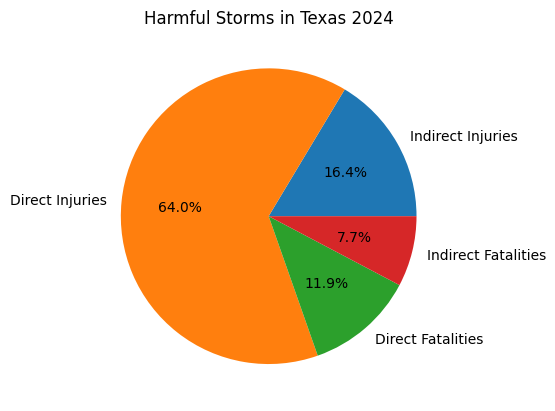

In [12]:
df_texas = df[df['STATE'] == 'TEXAS']

injuries_indirect_texas = df_texas[df_texas['INJURIES_INDIRECT'] > 0]['INJURIES_INDIRECT'].sum()
injuries_direct_texas = df_texas[df_texas['INJURIES_DIRECT'] > 0]['INJURIES_DIRECT'].sum()
fatalities_direct_texas = df_texas[df_texas['DEATHS_DIRECT'] > 0]['DEATHS_DIRECT'].sum()
fatalities_indirect_texas = df_texas[df_texas['DEATHS_INDIRECT'] > 0]['DEATHS_INDIRECT'].sum()

data = [injuries_indirect_texas, injuries_direct_texas, fatalities_direct_texas, fatalities_indirect_texas]

labels = ['Indirect Injuries', 'Direct Injuries', 'Direct Fatalities', 'Indirect Fatalities']

fig, ax = plt.subplots()
ax.pie(data, labels=labels, autopct='%1.1f%%')  
ax.set_title('Harmful Storms in Texas 2024')
plt.show()

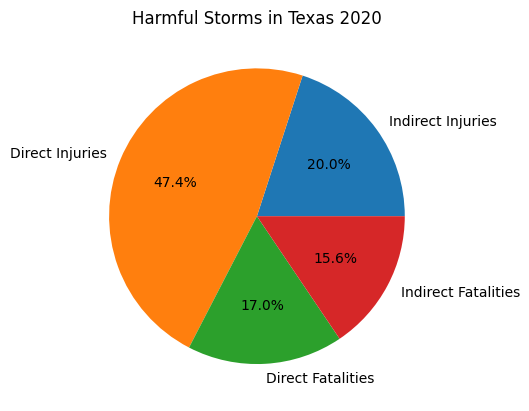

In [13]:
#Test for the other years
df = data_2020
df_texas = df[df['STATE'] == 'TEXAS']

injuries_indirect_texas = df_texas[df_texas['INJURIES_INDIRECT'] > 0]['INJURIES_INDIRECT'].sum()
injuries_direct_texas = df_texas[df_texas['INJURIES_DIRECT'] > 0]['INJURIES_DIRECT'].sum()
fatalities_direct_texas = df_texas[df_texas['DEATHS_DIRECT'] > 0]['DEATHS_DIRECT'].sum()
fatalities_indirect_texas = df_texas[df_texas['DEATHS_INDIRECT'] > 0]['DEATHS_INDIRECT'].sum()

data = [injuries_indirect_texas, injuries_direct_texas, fatalities_direct_texas, fatalities_indirect_texas]

labels = ['Indirect Injuries', 'Direct Injuries', 'Direct Fatalities', 'Indirect Fatalities']

fig, ax = plt.subplots()
ax.pie(data, labels=labels, autopct='%1.1f%%')  
ax.set_title('Harmful Storms in Texas 2020')
plt.show()

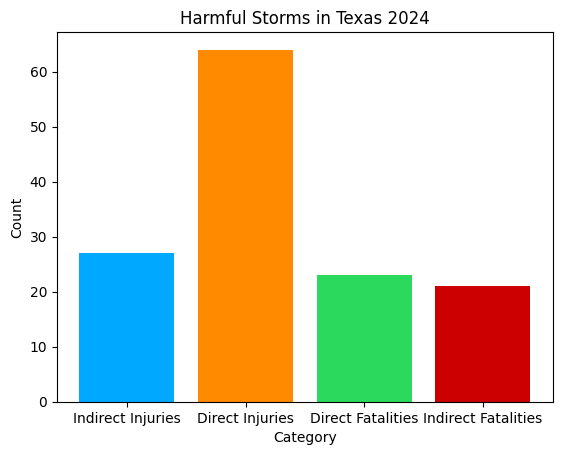

In [14]:
import matplotlib.pyplot as plt

data = [injuries_indirect_texas, injuries_direct_texas, fatalities_direct_texas, fatalities_indirect_texas]

labels = ['Indirect Injuries', 'Direct Injuries', 'Direct Fatalities', 'Indirect Fatalities']


colors = ['#00a9ff', '#ff8a00', '#2bda5c', '#cc0000']


fig, ax = plt.subplots()
ax.bar(labels, data, color=colors)

ax.set_title('Harmful Storms in Texas 2024')

ax.set_xlabel('Category')
ax.set_ylabel('Count')

plt.show()


In [15]:
!pip install folium

In [16]:
import folium
import pandas as pd

df = pd.read_csv('StormEvents_details-ftp_v1 (version 2).xlsb.csv')

texas_storms = df[df['STATE'] == 'TEXAS']

texas_storms = texas_storms.dropna(subset=['BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON'])

m = folium.Map(location=[31.9686, -99.9018], zoom_start=6)  

for index, row in texas_storms.iterrows():
    start_lat = row['BEGIN_LAT']
    start_lon = row['BEGIN_LON']
    end_lat = row['END_LAT']
    end_lon = row['END_LON']

    #folium.Marker([start_lat, start_lon], popup=f"Start: {row['EVENT_ID']}").add_to(m)
    #folium.Marker([end_lat, end_lon], popup=f"End: {row['EVENT_ID']}").add_to(m)

    folium.PolyLine(
        locations=[[start_lat, start_lon], [end_lat, end_lon]],
        color='blue', weight=2, opacity=0.6
    ).add_to(m)

m.save('texas_storms_map.html')

m


In [17]:
import folium
import pandas as pd
from folium.plugins import HeatMap

data_2024 = data_2024[data_2024["STATE"] == "TEXAS"]

data_2024["BEGIN_LAT"] = pd.to_numeric(data_2024["BEGIN_LAT"], errors="coerce")
data_2024["BEGIN_LON"] = pd.to_numeric(data_2024["BEGIN_LON"], errors="coerce")
data_2024 = data_2024.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

heat_data = [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2024.iterrows()]

texas_center = [31.9686, -99.9018]  
texas_map = folium.Map(location=texas_center, zoom_start=6)

HeatMap(heat_data, radius=10, blur=15, min_opacity=0.8).add_to(texas_map)

texas_map

In [18]:
data_2024 = data_2024[data_2024["STATE"] == "TEXAS"]
data_2023 = data_2023[data_2023["STATE"] == "TEXAS"]
data_2022 = data_2022[data_2022["STATE"] == "TEXAS"]
data_2021 = data_2021[data_2021["STATE"] == "TEXAS"]
data_2020 = data_2020[data_2020["STATE"] == "TEXAS"]
data_2019 = data_2019[data_2019["STATE"] == "TEXAS"]
data_2018 = data_2018[data_2018["STATE"] == "TEXAS"]
data_2017 = data_2017[data_2017["STATE"] == "TEXAS"]
data_2016 = data_2016[data_2016["STATE"] == "TEXAS"]
data_2015 = data_2015[data_2015["STATE"] == "TEXAS"]
data_2014 = data_2014[data_2014["STATE"] == "TEXAS"]
data_2013 = data_2013[data_2013["STATE"] == "TEXAS"]
data_2012 = data_2012[data_2012["STATE"] == "TEXAS"]
data_2011 = data_2011[data_2011["STATE"] == "TEXAS"]
data_2010 = data_2010[data_2010["STATE"] == "TEXAS"]
data_2009 = data_2009[data_2009["STATE"] == "TEXAS"]
data_2008 = data_2008[data_2008["STATE"] == "TEXAS"]
data_2007 = data_2007[data_2007["STATE"] == "TEXAS"]
data_2006 = data_2006[data_2006["STATE"] == "TEXAS"]
data_2005 = data_2005[data_2005["STATE"] == "TEXAS"]
data_2004 = data_2004[data_2004["STATE"] == "TEXAS"]
data_2003 = data_2003[data_2003["STATE"] == "TEXAS"]
data_2002 = data_2002[data_2002["STATE"] == "TEXAS"]


data_2024["BEGIN_LAT"] = pd.to_numeric(data_2024["BEGIN_LAT"], errors="coerce")
data_2024["BEGIN_LON"] = pd.to_numeric(data_2024["BEGIN_LON"], errors="coerce")
data_2024 = data_2024.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2023["BEGIN_LAT"] = pd.to_numeric(data_2023["BEGIN_LAT"], errors="coerce")
data_2023["BEGIN_LON"] = pd.to_numeric(data_2023["BEGIN_LON"], errors="coerce")
data_2023 = data_2023.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2022["BEGIN_LAT"] = pd.to_numeric(data_2022["BEGIN_LAT"], errors="coerce")
data_2022["BEGIN_LON"] = pd.to_numeric(data_2022["BEGIN_LON"], errors="coerce")
data_2022 = data_2022.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2021["BEGIN_LAT"] = pd.to_numeric(data_2021["BEGIN_LAT"], errors="coerce")
data_2021["BEGIN_LON"] = pd.to_numeric(data_2021["BEGIN_LON"], errors="coerce")
data_2021 = data_2021.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2020["BEGIN_LAT"] = pd.to_numeric(data_2020["BEGIN_LAT"], errors="coerce")
data_2020["BEGIN_LON"] = pd.to_numeric(data_2020["BEGIN_LON"], errors="coerce")
data_2020 = data_2020.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2019["BEGIN_LAT"] = pd.to_numeric(data_2019["BEGIN_LAT"], errors="coerce")
data_2019["BEGIN_LON"] = pd.to_numeric(data_2019["BEGIN_LON"], errors="coerce")
data_2019 = data_2019.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2018["BEGIN_LAT"] = pd.to_numeric(data_2018["BEGIN_LAT"], errors="coerce")
data_2018["BEGIN_LON"] = pd.to_numeric(data_2018["BEGIN_LON"], errors="coerce")
data_2018 = data_2018.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2017["BEGIN_LAT"] = pd.to_numeric(data_2017["BEGIN_LAT"], errors="coerce")
data_2017["BEGIN_LON"] = pd.to_numeric(data_2017["BEGIN_LON"], errors="coerce")
data_2017 = data_2017.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2016["BEGIN_LAT"] = pd.to_numeric(data_2016["BEGIN_LAT"], errors="coerce")
data_2016["BEGIN_LON"] = pd.to_numeric(data_2016["BEGIN_LON"], errors="coerce")
data_2016 = data_2016.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2015["BEGIN_LAT"] = pd.to_numeric(data_2015["BEGIN_LAT"], errors="coerce")
data_2015["BEGIN_LON"] = pd.to_numeric(data_2015["BEGIN_LON"], errors="coerce")
data_2015 = data_2015.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2014["BEGIN_LAT"] = pd.to_numeric(data_2014["BEGIN_LAT"], errors="coerce")
data_2014["BEGIN_LON"] = pd.to_numeric(data_2014["BEGIN_LON"], errors="coerce")
data_2014 = data_2014.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2013["BEGIN_LAT"] = pd.to_numeric(data_2013["BEGIN_LAT"], errors="coerce")
data_2013["BEGIN_LON"] = pd.to_numeric(data_2013["BEGIN_LON"], errors="coerce")
data_2013 = data_2013.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2012["BEGIN_LAT"] = pd.to_numeric(data_2012["BEGIN_LAT"], errors="coerce")
data_2012["BEGIN_LON"] = pd.to_numeric(data_2012["BEGIN_LON"], errors="coerce")
data_2012 = data_2012.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2011["BEGIN_LAT"] = pd.to_numeric(data_2011["BEGIN_LAT"], errors="coerce")
data_2011["BEGIN_LON"] = pd.to_numeric(data_2011["BEGIN_LON"], errors="coerce")
data_2011 = data_2011.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2010["BEGIN_LAT"] = pd.to_numeric(data_2010["BEGIN_LAT"], errors="coerce")
data_2010["BEGIN_LON"] = pd.to_numeric(data_2010["BEGIN_LON"], errors="coerce")
data_2010 = data_2010.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2009["BEGIN_LAT"] = pd.to_numeric(data_2009["BEGIN_LAT"], errors="coerce")
data_2009["BEGIN_LON"] = pd.to_numeric(data_2009["BEGIN_LON"], errors="coerce")
data_2009 = data_2009.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2008["BEGIN_LAT"] = pd.to_numeric(data_2008["BEGIN_LAT"], errors="coerce")
data_2008["BEGIN_LON"] = pd.to_numeric(data_2008["BEGIN_LON"], errors="coerce")
data_2008 = data_2008.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2007["BEGIN_LAT"] = pd.to_numeric(data_2007["BEGIN_LAT"], errors="coerce")
data_2007["BEGIN_LON"] = pd.to_numeric(data_2007["BEGIN_LON"], errors="coerce")
data_2007 = data_2007.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2006["BEGIN_LAT"] = pd.to_numeric(data_2006["BEGIN_LAT"], errors="coerce")
data_2006["BEGIN_LON"] = pd.to_numeric(data_2006["BEGIN_LON"], errors="coerce")
data_2006 = data_2006.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2005["BEGIN_LAT"] = pd.to_numeric(data_2005["BEGIN_LAT"], errors="coerce")
data_2005["BEGIN_LON"] = pd.to_numeric(data_2005["BEGIN_LON"], errors="coerce")
data_2005 = data_2005.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2004["BEGIN_LAT"] = pd.to_numeric(data_2004["BEGIN_LAT"], errors="coerce")
data_2004["BEGIN_LON"] = pd.to_numeric(data_2004["BEGIN_LON"], errors="coerce")
data_2004 = data_2004.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2003["BEGIN_LAT"] = pd.to_numeric(data_2003["BEGIN_LAT"], errors="coerce")
data_2003["BEGIN_LON"] = pd.to_numeric(data_2003["BEGIN_LON"], errors="coerce")
data_2003 = data_2003.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

data_2002["BEGIN_LAT"] = pd.to_numeric(data_2002["BEGIN_LAT"], errors="coerce")
data_2002["BEGIN_LON"] = pd.to_numeric(data_2002["BEGIN_LON"], errors="coerce")
data_2002 = data_2002.dropna(subset=["BEGIN_LAT", "BEGIN_LON"])

heat_data = [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2024.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2023.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2022.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2021.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2020.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2019.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2018.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2017.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2016.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2015.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2014.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2013.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2012.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2011.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2010.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2009.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2008.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2007.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2006.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2005.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2004.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2003.iterrows()]
heat_data += [(row["BEGIN_LAT"], row["BEGIN_LON"]) for _, row in data_2002.iterrows()]

texas_center = [31.9686, -99.9018]  
texas_map = folium.Map(location=texas_center, zoom_start=6)

HeatMap(heat_data, radius=7, blur=5, min_opacity=0.8).add_to(texas_map)

texas_map

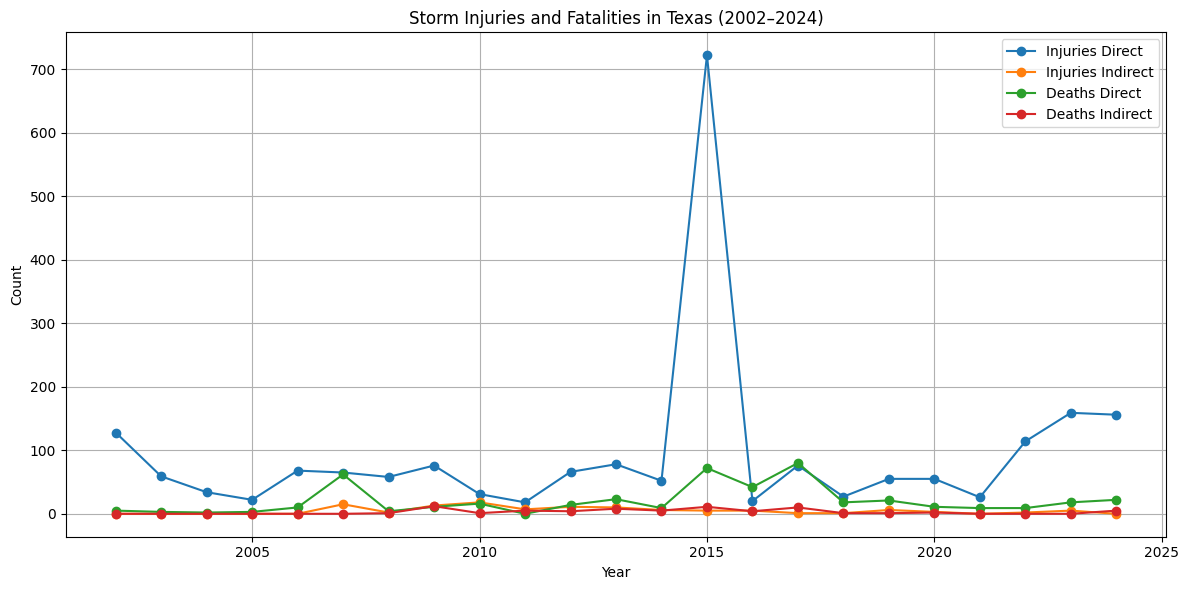

In [19]:
storm_data = {
    2002: data_2002, 2003: data_2003, 2004: data_2004, 2005: data_2005,
    2006: data_2006, 2007: data_2007, 2008: data_2008, 2009: data_2009,
    2010: data_2010, 2011: data_2011, 2012: data_2012, 2013: data_2013,
    2014: data_2014, 2015: data_2015, 2016: data_2016, 2017: data_2017,
    2018: data_2018, 2019: data_2019, 2020: data_2020, 2021: data_2021,
    2022: data_2022, 2023: data_2023, 2024: data_2024
}

summary = pd.DataFrame(columns=[
    'Year', 'Injuries_Direct', 'Injuries_Indirect', 'Deaths_Direct', 'Deaths_Indirect'
])

for year, df in storm_data.items():
    df_texas = df[df['STATE'] == 'TEXAS']
    summary = pd.concat([summary, pd.DataFrame({
        'Year': [year],
        'Injuries_Direct': [df_texas['INJURIES_DIRECT'].sum()],
        'Injuries_Indirect': [df_texas['INJURIES_INDIRECT'].sum()],
        'Deaths_Direct': [df_texas['DEATHS_DIRECT'].sum()],
        'Deaths_Indirect': [df_texas['DEATHS_INDIRECT'].sum()]
    })], ignore_index=True)

summary = summary.sort_values(by='Year')

plt.figure(figsize=(12, 6))
plt.plot(summary['Year'], summary['Injuries_Direct'], label='Injuries Direct', marker='o')
plt.plot(summary['Year'], summary['Injuries_Indirect'], label='Injuries Indirect', marker='o')
plt.plot(summary['Year'], summary['Deaths_Direct'], label='Deaths Direct', marker='o')
plt.plot(summary['Year'], summary['Deaths_Indirect'], label='Deaths Indirect', marker='o')
plt.title('Storm Injuries and Fatalities in Texas (2002–2024)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



=== Forecasting Injuries_Direct ===
Selected ARIMA order: (0, 0, 0)


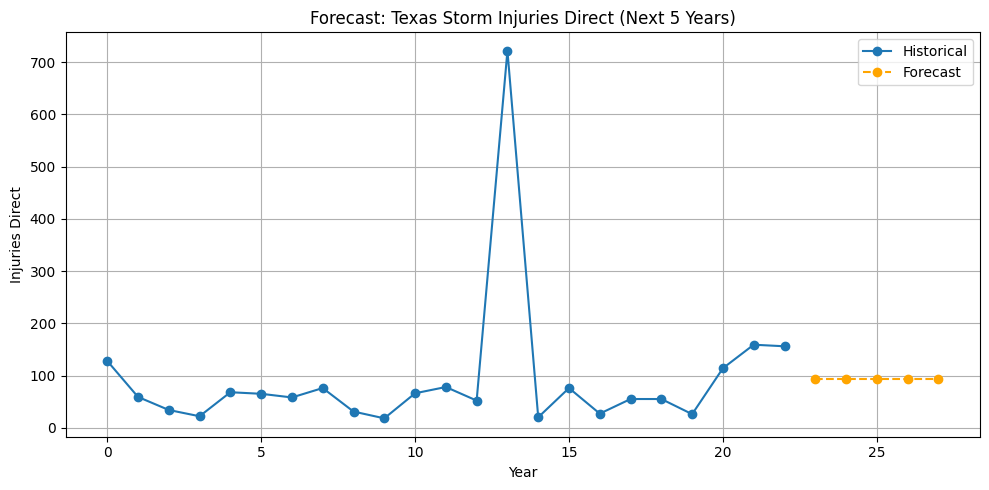


=== Forecasting Injuries_Indirect ===
Selected ARIMA order: (3, 0, 0)


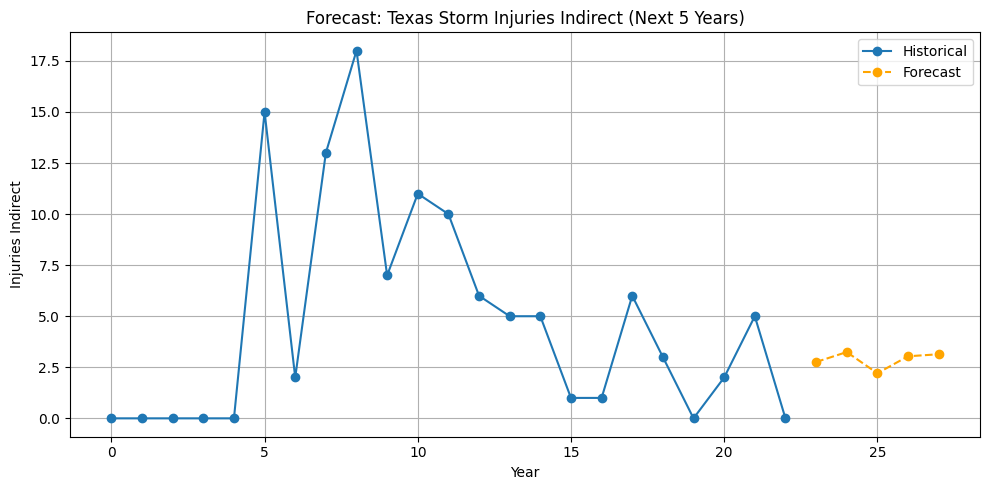


=== Forecasting Deaths_Direct ===
Selected ARIMA order: (0, 0, 0)


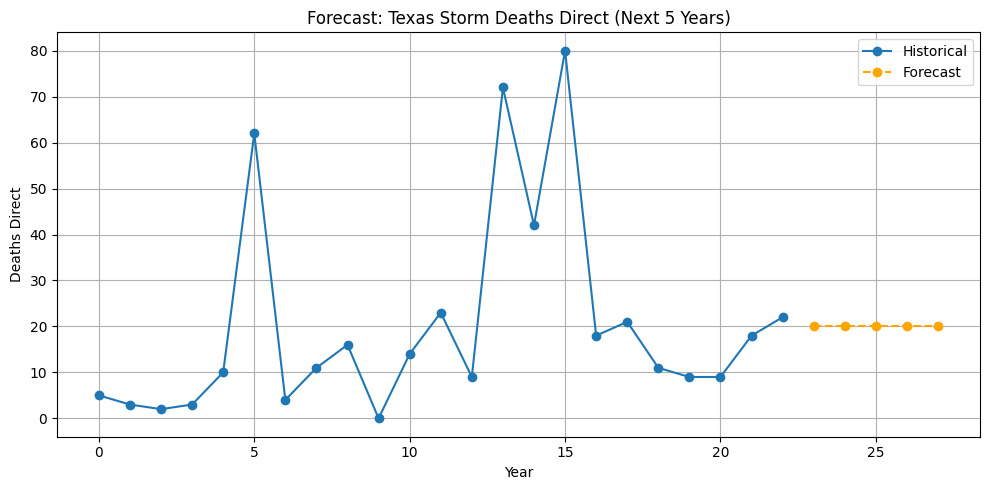


=== Forecasting Deaths_Indirect ===
Selected ARIMA order: (2, 0, 0)


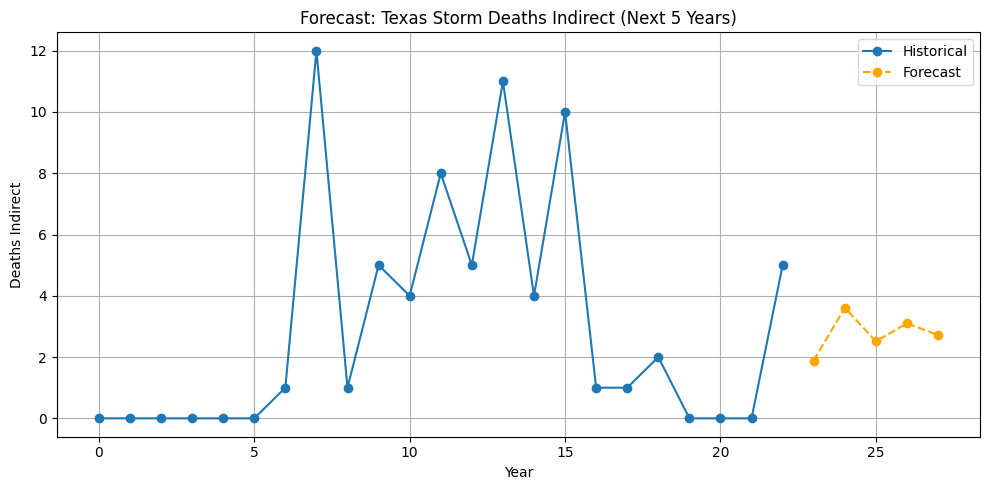

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

summary.index = pd.to_numeric(summary.index, errors='coerce')
summary = summary.dropna().astype(float)
summary = summary.sort_index()

metrics = ['Injuries_Direct', 'Injuries_Indirect', 'Deaths_Direct', 'Deaths_Indirect']
forecast_horizon = 5
all_forecasts = {}

for metric in metrics:
    print(f"\n=== Forecasting {metric} ===")
    
    y = summary[metric].dropna()
    y = pd.to_numeric(y, errors='coerce')
    
    model_auto = auto_arima(y, seasonal=False, stepwise=True, suppress_warnings=True)
    print(f"Selected ARIMA order: {model_auto.order}")

    model = ARIMA(y, order=model_auto.order)
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=forecast_horizon)
    forecast_years = list(range(int(y.index[-1]) + 1, int(y.index[-1]) + forecast_horizon + 1))
    forecast.index = forecast_years
    all_forecasts[metric] = forecast

    plt.figure(figsize=(10, 5))
    plt.plot(y, label='Historical', marker='o')
    plt.plot(forecast, label='Forecast', linestyle='--', marker='o', color='orange')
    plt.title(f"Forecast: Texas Storm {metric.replace('_', ' ')} (Next {forecast_horizon} Years)")
    plt.xlabel("Year")
    plt.ylabel(metric.replace('_', ' '))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


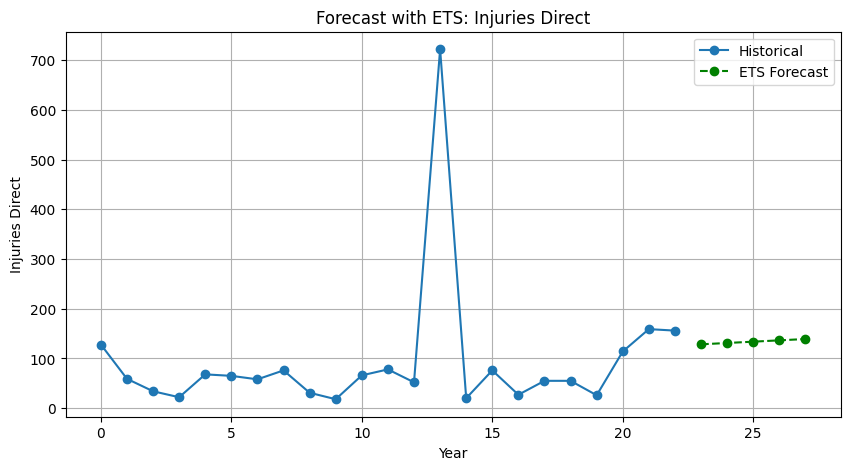

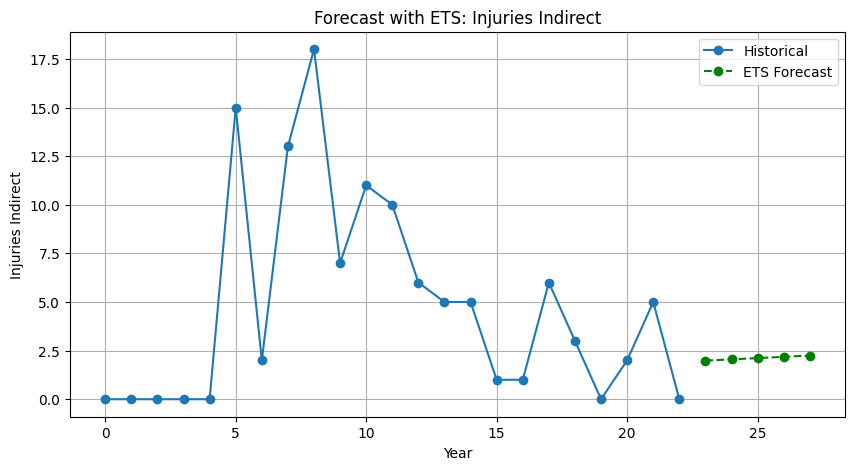

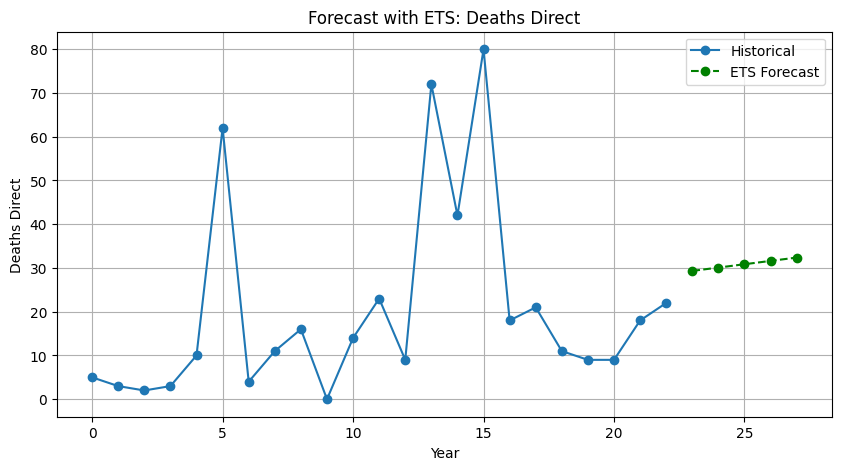

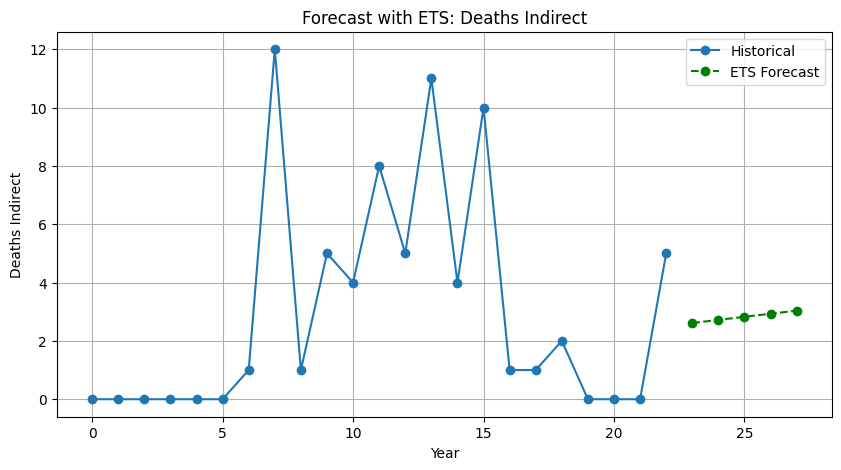

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

for metric in metrics:
    y = summary[metric].dropna()
    y = pd.to_numeric(y, errors='coerce')

    model = ExponentialSmoothing(y, trend='add', seasonal=None)
    model_fit = model.fit()

    forecast = model_fit.forecast(forecast_horizon)
    forecast.index = list(range(int(y.index[-1]) + 1, int(y.index[-1]) + forecast_horizon + 1))

    plt.figure(figsize=(10, 5))
    plt.plot(y, label='Historical', marker='o')
    plt.plot(forecast, label='ETS Forecast', linestyle='--', marker='o', color='green')
    plt.title(f"Forecast with ETS: {metric.replace('_', ' ')}")
    plt.xlabel("Year")
    plt.ylabel(metric.replace('_', ' '))
    plt.legend()
    plt.grid(True)
    plt.show()


In [22]:
!pip install folium

In [25]:
import folium
from folium.plugins import HeatMap
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

df_texas = pd.concat(storm_data.values(), ignore_index=True)

possible_date_cols = [col for col in df_texas.columns if 'DATE' in col.upper()]
date_col = possible_date_cols[0]
df_texas['YEAR'] = pd.to_datetime(df_texas[date_col], errors='coerce').dt.year
df_texas = df_texas.dropna(subset=['YEAR', 'BEGIN_LAT', 'BEGIN_LON'])
df_texas['YEAR'] = df_texas['YEAR'].astype(int)

storm_counts = df_texas.groupby('YEAR').size()

model = ARIMA(storm_counts, order=(2, 1, 1))
model_fit = model.fit()
future_years = np.arange(storm_counts.index.max() + 1, storm_counts.index.max() + 6)
forecast = model_fit.forecast(steps=5).astype(int)

historical_coords = df_texas[['BEGIN_LAT', 'BEGIN_LON']].dropna().values

m = folium.Map(location=[31.0, -99.0], zoom_start=6, tiles='CartoDB dark_matter')

HeatMap(historical_coords, name='Historical Storms').add_to(m)

for year, count in zip(future_years, forecast):
    if count > 0:
        sampled = historical_coords[np.random.choice(historical_coords.shape[0], size=count)]
        HeatMap(sampled, name=f'Predicted {year}', radius=5, blur=7).add_to(m)

folium.LayerControl().add_to(m)

m


C:\Users\jaseb\AppData\Local\Temp\ipykernel_27728\4058349287.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_texas['YEAR'] = pd.to_datetime(df_texas[date_col], errors='coerce').dt.year
c:\Users\jaseb\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jaseb\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jaseb\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jaseb\anac